# Sulcal morpholgy figures and demographic variables (covariates)

Last updated: 02-01-2024.

Code for generating Fig. 2 (mean sulcal thickness and mean sulcal depth), Fig. 3 (mean anterior-posterior coordinate vs. mean thickness), and Extended Data Fig. 5-1 (distribution of cog scores)

This notebook contains part of the analysis pipeline and figures for the following manuscript: Maboudian et al., JNeurosci 2024. Defining overlooked structures reveals new associations between cortex and cognition in aging and Alzheimer’s disease (accepted).

For simplicity, this notebook references cleaned and formatted data from .csv files included in this repository. If you have any questions about the data please contact the corresponding author (Samira Maboudian).

# load packages & data

In [1]:
## packages ##

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

%matplotlib inline
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpatches
plt.style.use('default')

import pandas as pd
from scipy import stats


In [2]:
## data: morphology ##
morphology_AD_CN_YA = pd.read_csv(
    "data/df_SulcMorph_AD72_CN72_YA72_final.csv")
print(len(morphology_AD_CN_YA))
morphology_AD_CN_YA.columns

4362


Index(['Unnamed: 0', 'sub', 'group', 'hemi', 'label', 'vertices',
       'cortical_thickness_mean', 'sulcal_depth_mm'],
      dtype='object')

In [3]:
## data: cog scores & demographics (age, edu, sex)  ##

df_wide_cog_thickness_demog = pd.read_csv(
     'data/df_wide_npsych_demog_cortical-thickness-mean_both-hemis_CN72_AD72_forLASSO_final.csv')
df_wide_cog_thickness_demog[['Subject', 'Group', 'closest UWNPSYCH ADNI_MEM score',
                             'Age', 'PTEDUCAT', 'Sex_binary',]].head()


,Subject,Group,closest UWNPSYCH ADNI_MEM score,Age,PTEDUCAT,Sex_binary
0,033_S_1016,CN,0.676,89.0,13.0,1
1,033_S_5017,AD,-1.200,84.0,18.0,0
2,022_S_6069,CN,1.355,75.0,18.0,1
3,007_S_4488,CN,1.061,79.0,18.0,0
4,033_S_5013,AD,-0.897,68.0,18.0,1


In [4]:
## data: wide df of thickness values for sulci, with cog (uwnpsych) scores -- hemis separate
df_npsych_morph_wide_thickness = pd.read_csv(
    'data/df_wide_npsych_demog_cortical-thickness-mean_CN72_AD72_forLASSO_final.csv')
df_npsych_morph_wide_thickness_RightHem = df_npsych_morph_wide_thickness[
    df_npsych_morph_wide_thickness['hemi']=='rh']
df_npsych_morph_wide_thickness_LeftHem = df_npsych_morph_wide_thickness[
    df_npsych_morph_wide_thickness['hemi']=='lh']
df_npsych_morph_wide_thickness[['Subject', 'Group', 'closest UWNPSYCH ADNI_MEM score',
                                'closest UWNPSYCH ADNI_EF score',
                             'Age', 'PTEDUCAT', 'Sex_binary',]].head()

,Subject,Group,closest UWNPSYCH ADNI_MEM score,closest UWNPSYCH ADNI_EF score,Age,PTEDUCAT,Sex_binary
0,033_S_1016,CN,0.676,0.428,89.0,13.0,1
1,033_S_1016,CN,0.676,0.428,89.0,13.0,1
2,033_S_5017,AD,-1.200,-0.881,84.0,18.0,0
3,033_S_5017,AD,-1.200,-0.881,84.0,18.0,0
4,022_S_6069,CN,1.355,0.422,75.0,18.0,1


In [5]:
## data: mean RAS ant-post coord and mean sulcal thickness  ##
df_coords = pd.read_csv('data/df_mean-RAS-A-coord_mean-Thickness_final.csv')

df_coords.head()

,Unnamed: 0,sulcus,mean anterior-posterior coordinate,CN mean thickness - YA mean thickness,AD mean thickness - CN mean thickness,CN mean thickness - AD mean thickness,AD mean thickness - YA mean thickness,YA mean thickness - CN mean thickness,YA mean thickness - AD mean thickness,(CN-YA)-(AD-CN)
0,0,pos,-57.252218,-0.214271,-0.101285,0.101285,-0.315556,0.214271,0.315556,-0.112986
1,1,prculs-d,-62.250854,-0.230653,-0.153104,0.153104,-0.383757,0.230653,0.383757,-0.077549
2,2,prcus-p,-57.523462,-0.232375,-0.115382,0.115382,-0.347757,0.232375,0.347757,-0.116993
3,3,prcus-i,-55.158216,-0.225208,-0.114319,0.114319,-0.339528,0.225208,0.339528,-0.110889
4,4,prcus-a,-48.154583,-0.314750,-0.057742,0.057742,-0.372492,0.314750,0.372492,-0.257008


# sex: %F subjects
Sex_binary: 0 = M, 1 = F 


In [6]:
# CN (cog. normal) OA only 

df_wide_cog_thickness_demog_CN = df_wide_cog_thickness_demog[
    df_wide_cog_thickness_demog['Group']=='CN']
print('num. OA:', len(df_wide_cog_thickness_demog_CN))
num_CN_M = len(df_wide_cog_thickness_demog_CN[df_wide_cog_thickness_demog_CN['Sex_binary']==0])
num_CN_F = len(df_wide_cog_thickness_demog_CN[df_wide_cog_thickness_demog_CN['Sex_binary']==1])

print('num. M: ', num_CN_M)
print('num. F: ', num_CN_F)

print('%F, OA:', round(num_CN_F/72,4))

num. OA: 72
num. M:  34
num. F:  38
%F, OA: 0.5278


In [7]:
# AD only 

df_wide_cog_thickness_demog_AD = df_wide_cog_thickness_demog[
    df_wide_cog_thickness_demog['Group']=='AD']
print('num. AD:', len(df_wide_cog_thickness_demog_AD))
num_AD_M = len(df_wide_cog_thickness_demog_AD[df_wide_cog_thickness_demog_AD['Sex_binary']==0])
num_AD_F = len(df_wide_cog_thickness_demog_AD[df_wide_cog_thickness_demog_AD['Sex_binary']==1])

print('num. M: ', num_AD_M)
print('num. F: ', num_AD_F)

print('%F, AD:', round(num_AD_F/72,4))

num. AD: 72
num. M:  37
num. F:  35
%F, AD: 0.4861


In [8]:
# total
# 36 YA (50%) are F; see Willbrand, Maboudian et al., 2023
print('total %F:', round((num_CN_F+num_AD_F+36)/(3*72),4))

total %F: 0.5046


# plots: sulcal morphology across groups

### Fig 2A: cortical thickness

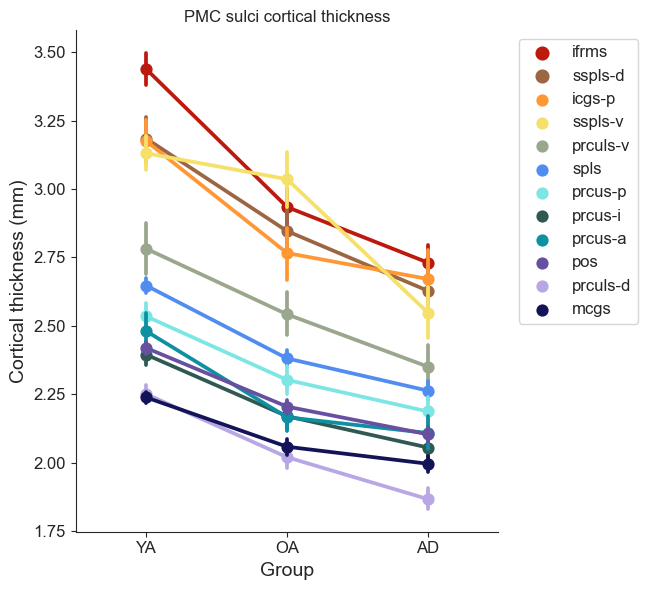

In [9]:
#setup
order = ['YA_HCP', 'CN', 'AD']
colors_sulci = {    
          "ifrms": "#BD190D",    
           "sspls-d": "#9D6642",   
            "icgs-p": "#FF9734",   
           "sspls-v": "#F5E06A",  
           "prculs-v": "#9AA78C",   
         
         "spls": "#518DF0",      
         "prcus-p": "#7CE6E5",   
           "prcus-i": "#2F5952",   
           "prcus-a": "#0C90A2",  
            "pos": "#6850A0",       
           "prculs-d": "#B8A7E4",  
           "mcgs": "#131458"       
         } 
sns.set_style("ticks")

#plot
fig= plt.subplots(figsize=(7,6))
ax = sns.pointplot(x='group', y='cortical_thickness_mean', 
                   data=morphology_AD_CN_YA, 
                   order=order, errorbar=('ci', 95),
                   hue='label', hue_order=list(colors_sulci.keys()),
                   markers = "o",
                  palette = colors_sulci) 
#legend
lgnd = plt.legend(
                  loc='upper right', scatterpoints=1, fontsize=12, bbox_to_anchor=(1.35, 1.0))

lgnd.legend_handles[0].set_sizes([66])
lgnd.legend_handles[1].set_sizes([66])

#title + axes
plt.title('PMC sulci cortical thickness' )
ax.set_xticklabels(['YA','OA','AD'], fontsize=12)
plt.ylabel('Cortical thickness (mm)', fontsize=14)
plt.xlabel('Group', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()


### Fig 2B: sulcal depth

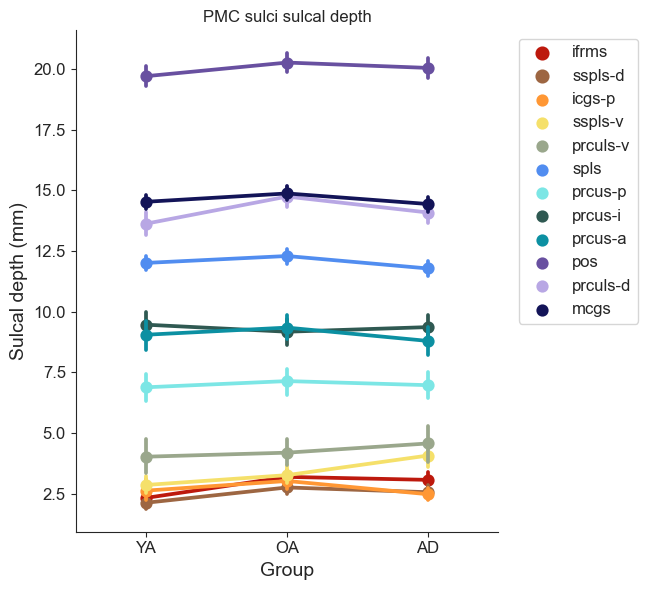

In [10]:
#setup
order = ['YA_HCP', 'CN', 'AD']
sns.set_style("ticks")

#plot
fig= plt.subplots(figsize=(7,6))
ax = sns.pointplot(x='group', y='sulcal_depth_mm', 
                   data=morphology_AD_CN_YA, 
                   order=order, errorbar=('ci', 95),
                   hue='label', hue_order=list(colors_sulci.keys()),
                   markers = "o",
                  palette = colors_sulci) 
#legend
lgnd = plt.legend(
                  loc='upper right', scatterpoints=1, fontsize=12, bbox_to_anchor=(1.35, 1.0))

lgnd.legend_handles[0].set_sizes([66])
lgnd.legend_handles[1].set_sizes([66])

#title + axes
plt.title('PMC sulci sulcal depth')
ax.set_xticklabels(['YA','OA','AD'], fontsize=12)
plt.ylabel('Sulcal depth (mm)', fontsize=14)
plt.xlabel('Group', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

# Hide the right and top spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()


# mean RAS coordinate plots + correlation

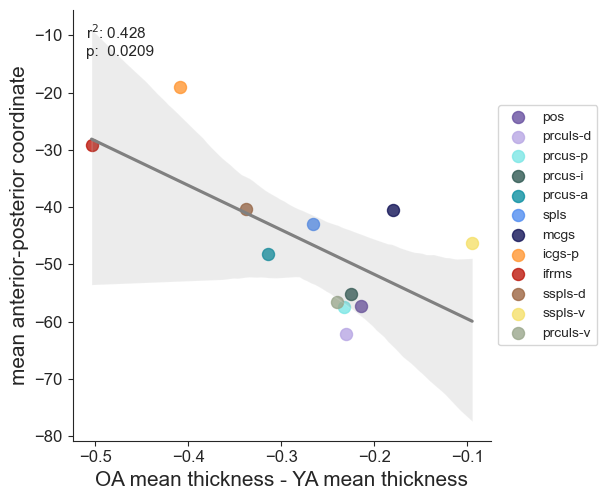

In [11]:
# get coeffs of linear fit
x_lab = 'CN mean thickness - YA mean thickness'
y_lab = 'mean anterior-posterior coordinate'
df = df_coords
hue_group = 'sulcus'

slope, intercept, r_value, p_value, std_err = stats.linregress(
    df[x_lab],df[y_lab])

# Use lmplot to plot scatter points
sns.lmplot(x=x_lab, y=y_lab, hue=hue_group,
           palette=colors_sulci, 
           scatter_kws={"s": 75},
           data=df, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
ax = sns.regplot(x=x_lab, y=y_lab, data=df, scatter_kws={"zorder":-1},
line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, scatter=False, color='gray')

#add r2 and p
r = stats.pearsonr(df[x_lab], df[y_lab])  #calculate stats
anc = AnchoredText('r$^2$: '+str(round(r[0]**2,3))+'\np:  '+str(round(r[1],4)), 
                   loc="upper left", prop=dict(fontsize=11), frameon=False);  #get stats for plot
ax.add_artist(anc);   #add stats to plot

plt.tight_layout()
box = ax.get_position()

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('OA mean thickness - YA mean thickness', fontsize=15);
plt.ylabel(y_lab, fontsize=15);
ax.tick_params(axis='both', labelsize=12)


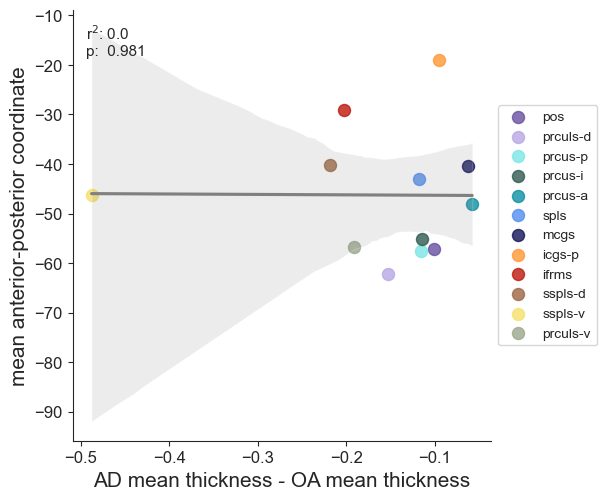

In [12]:
# get coeffs of linear fit
x_lab = 'AD mean thickness - CN mean thickness'
y_lab = 'mean anterior-posterior coordinate'
df = df_coords
hue_group = 'sulcus'

slope, intercept, r_value, p_value, std_err = stats.linregress(
    df[x_lab],df[y_lab])

# Use lmplot to plot scatter points
sns.lmplot(x=x_lab, y=y_lab, hue=hue_group, palette=colors_sulci,
                      scatter_kws={"s": 75},
           data=df, fit_reg=False, legend=False)

# Use regplot to plot the regression line and use line_kws to set line label for legend
ax = sns.regplot(x=x_lab, y=y_lab, data=df, scatter_kws={"zorder":-1},
line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}, scatter=False, color='gray')

#add r2 and p
r = stats.pearsonr(df[x_lab], df[y_lab])  #calculate stats
anc = AnchoredText('r$^2$: '+str(round(r[0]**2,3))+'\np:  '+str(round(r[1],3)), 
                   loc="upper left", prop=dict(fontsize=11), frameon=False);  #get stats for plot
ax.add_artist(anc);   #add stats to plot

plt.tight_layout()
box = ax.get_position()

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('AD mean thickness - OA mean thickness', fontsize=15);
plt.ylabel(y_lab, fontsize=15);
ax.tick_params(axis='both', labelsize=12)


# Extended Data Fig. 5-1. Distribution of cog scores across groups


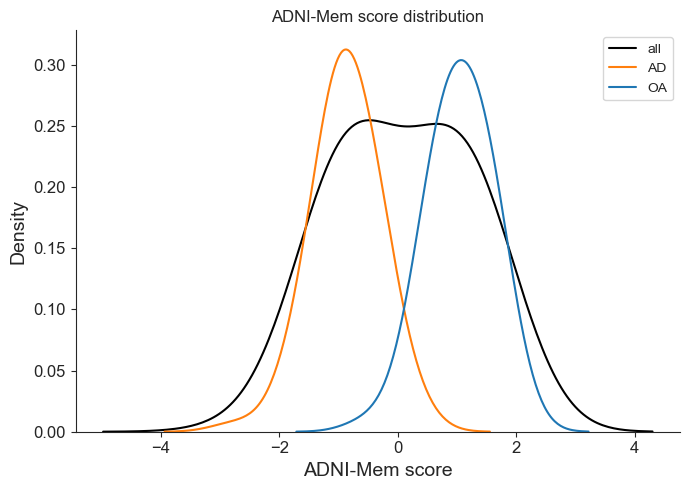

In [13]:
fig,ax = plt.subplots(figsize=(7,5))

sns.kdeplot(data=df_npsych_morph_wide_thickness, x="closest UWNPSYCH ADNI_MEM score", 
            bw_adjust=2.1, color = 'black')
sns.kdeplot(data=df_npsych_morph_wide_thickness, x="closest UWNPSYCH ADNI_MEM score", 
            hue = 'Group',bw_adjust=2)

plt.xlabel("ADNI-Mem score", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("ADNI-Mem score distribution")
plt.legend(labels=['all','AD', 'OA'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout()


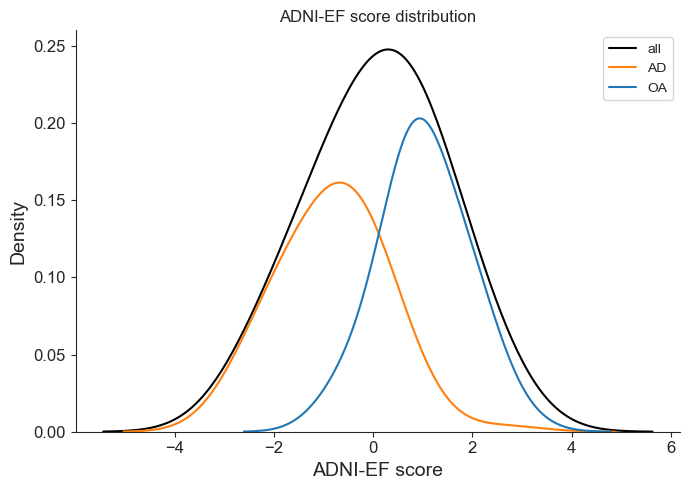

In [14]:
fig,ax = plt.subplots(figsize=(7,5))

sns.kdeplot(data=df_npsych_morph_wide_thickness, x="closest UWNPSYCH ADNI_EF score", 
            bw_adjust=2.1, color = 'black')

sns.kdeplot(data=df_npsych_morph_wide_thickness, x="closest UWNPSYCH ADNI_EF score", 
            hue = 'Group',bw_adjust=2)

plt.xlabel("ADNI-EF score", fontsize=14)
plt.title("ADNI-EF score distribution")
plt.ylabel("Density", fontsize=14)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(labels=['all','AD', 'OA'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()


## covariate associations with cognition

In [15]:
# Age

df_npsych_morph_wide_thickness_rhs_age = df_npsych_morph_wide_thickness_RightHem[['Subject',
                                                                             'Group',
                                                                            'closest UWNPSYCH ADNI_MEM score',
                                                                            'Age']]
df_npsych_morph_wide_thickness_rhs_age=df_npsych_morph_wide_thickness_rhs_age.dropna()



r, p = stats.pearsonr(df_npsych_morph_wide_thickness_rhs_age['Age'], 
                      df_npsych_morph_wide_thickness_rhs_age['closest UWNPSYCH ADNI_MEM score'])
print('r_p: ',r, '\np: ',p)

r, p = stats.spearmanr(df_npsych_morph_wide_thickness_rhs_age['Age'], 
                      df_npsych_morph_wide_thickness_rhs_age['closest UWNPSYCH ADNI_MEM score'])
print('\nr_s: ',r, '\np: ',p)


r_p:  -0.032504465550259154 
p:  0.6989366062386119

r_s:  -0.03647881613306554 
p:  0.6642338471531513


In [16]:
df_npsych_morph_wide_thickness_rhs_age_CN = df_npsych_morph_wide_thickness_rhs_age[
    df_npsych_morph_wide_thickness_rhs_age['Group']=='CN']
df_npsych_morph_wide_thickness_rhs_age_AD = df_npsych_morph_wide_thickness_rhs_age[
    df_npsych_morph_wide_thickness_rhs_age['Group']=='AD']

r, p = stats.pearsonr(df_npsych_morph_wide_thickness_rhs_age_CN['Age'], 
                      df_npsych_morph_wide_thickness_rhs_age_CN['closest UWNPSYCH ADNI_MEM score'])
print('CN - r_p: ',r, '\np: ',p)

r, p = stats.pearsonr(df_npsych_morph_wide_thickness_rhs_age_AD['Age'], 
                      df_npsych_morph_wide_thickness_rhs_age_AD['closest UWNPSYCH ADNI_MEM score'])
print('\nAD - r_p: ',r, '\np: ',p)



CN - r_p:  -0.19888323177209105 
p:  0.09396925802398669

AD - r_p:  0.10951539595480109 
p:  0.3597907463759637


In [17]:
# Edu

df_npsych_morph_wide_thickness_rhs_Edu = df_npsych_morph_wide_thickness_RightHem[['Subject',
                                                                             'Group',
                                                                            'closest UWNPSYCH ADNI_MEM score',
                                                                            'PTEDUCAT']]
df_npsych_morph_wide_thickness_rhs_Edu=df_npsych_morph_wide_thickness_rhs_Edu.dropna()


r, p = stats.pearsonr(df_npsych_morph_wide_thickness_rhs_Edu['PTEDUCAT'], 
                      df_npsych_morph_wide_thickness_rhs_Edu['closest UWNPSYCH ADNI_MEM score'])
print('r_p: ',r, '\np: ',p)


r, p = stats.spearmanr(df_npsych_morph_wide_thickness_rhs_Edu['PTEDUCAT'], 
                      df_npsych_morph_wide_thickness_rhs_Edu['closest UWNPSYCH ADNI_MEM score'])
print('\nr_s: ',r, '\np: ',p)


r_p:  0.12142923634428454 
p:  0.14710820786954193

r_s:  0.1229400531998217 
p:  0.14210483883284694


In [18]:
df_npsych_morph_wide_thickness_rhs_Edu_CN = df_npsych_morph_wide_thickness_rhs_Edu[
    df_npsych_morph_wide_thickness_rhs_Edu['Group']=='CN']
df_npsych_morph_wide_thickness_rhs_Edu_AD = df_npsych_morph_wide_thickness_rhs_Edu[
    df_npsych_morph_wide_thickness_rhs_Edu['Group']=='AD']

r, p = stats.pearsonr(df_npsych_morph_wide_thickness_rhs_Edu_CN['PTEDUCAT'], 
                      df_npsych_morph_wide_thickness_rhs_Edu_CN['closest UWNPSYCH ADNI_MEM score'])
print('CN - r_p: ',r, '\np: ',p)

r, p = stats.pearsonr(df_npsych_morph_wide_thickness_rhs_Edu_AD['PTEDUCAT'], 
                      df_npsych_morph_wide_thickness_rhs_Edu_AD['closest UWNPSYCH ADNI_MEM score'])
print('\nAD - r_p: ',r, '\np: ',p)

CN - r_p:  0.013489282257016325 
p:  0.9104569253107433

AD - r_p:  -0.047415543058984606 
p:  0.6924625769255426


In [19]:
# Sex

df_npsych_morph_wide_thickness_rhs_Sex = df_npsych_morph_wide_thickness_RightHem[['Subject',
                                                                             'Group',
                                                                            'closest UWNPSYCH ADNI_MEM score',
                                                                            'Sex_binary']]
df_npsych_morph_wide_thickness_rhs_Sex=df_npsych_morph_wide_thickness_rhs_Sex.dropna()


df_npsych_morph_wide_thickness_rhs_0 = df_npsych_morph_wide_thickness_rhs_Sex[
    df_npsych_morph_wide_thickness_rhs_Sex['Sex_binary']==0]
df_npsych_morph_wide_thickness_rhs_1 = df_npsych_morph_wide_thickness_rhs_Sex[
    df_npsych_morph_wide_thickness_rhs_Sex['Sex_binary']==1]

stats.ttest_ind

stats.ttest_ind(df_npsych_morph_wide_thickness_rhs_0['closest UWNPSYCH ADNI_MEM score'],
               df_npsych_morph_wide_thickness_rhs_1['closest UWNPSYCH ADNI_MEM score'])

Ttest_indResult(statistic=-1.4679331909377302, pvalue=0.14433392928148872)